# Wine Quality Analysis
## Table of Contents
<ul>
<a>Introduction</a><br />
<a>Data Wrangling</a><br />
<a>Exploratory Data Analysis</a><br />
<a>Conclusions</a>
</ul>


## Introduction

I am using two datasets to analyze the quality of two types of wine.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_red=pd.read_csv('winequality-red.csv',sep=';')
df_white=pd.read_csv('winequality-white.csv',sep=';')

In [2]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Overview

In [4]:
df_red.shape

(1599, 12)

In [5]:
df_white.shape

(4898, 12)

In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df_white.duplicated().sum()

937

In [9]:
df_white['quality'].nunique()

7

In [10]:
df_red['density'].mean()

0.9967466791744833

In [11]:
df_white['density'].mean()

0.9940273764801896

## Data Wrangling



In order to combine two datasets, first, I create a column named "color" to represent the color of the wine. 

In [12]:
# create color array for red dataframe
color_red = np.repeat('red',1599)

# create color array for white dataframe
color_white = np.repeat('white', 4898)

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. 

In [13]:
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
# rename total_sulfur-dioxide column to total_sulfur_dioxide
df_red = df_red.rename(columns ={'total_sulfur-dioxide' :'total_sulfur_dioxide'})

Do the same for the white dataframe and use `head()` to confirm the change.

In [16]:
df_white['color'] = color_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [17]:
# Combine dataframe
df_wine = df_red.append(df_white, sort=True)

# view dataframe to check for success
df_wine.head()

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,red,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,red,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,red,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70


In [18]:
df_wine.shape

(6497, 13)


Save the newly combined dataframe as `winequality_edited.csv`. 

In [19]:
df_wine.to_csv('winequality_edited.csv',index=False)

## Exploratory Data Analysis
Create visualizations to answer some interesting questions

In [20]:
# Load dataset
df = pd.read_csv('winequality_edited.csv')

In [21]:
df.head()

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,red,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,red,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,red,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70


### Histograms for Various Features

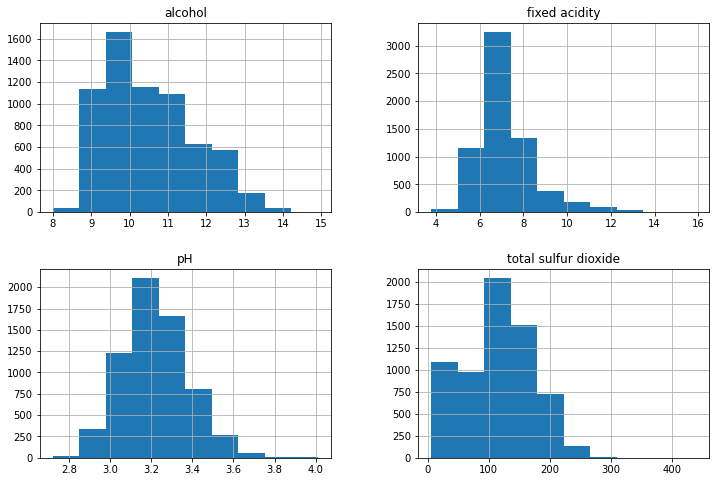

In [31]:

df.hist(column = ['fixed acidity','total sulfur dioxide', 'pH','alcohol'], figsize=(12,8));

Variable "fix acidity" and "alcohol" are skewed to the right.

### Scatterplots of Quality Against Various Features

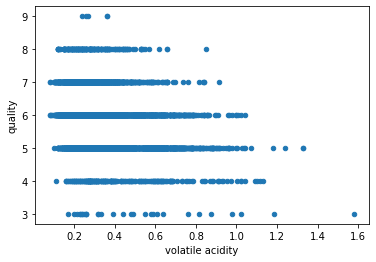

In [36]:
df.plot(x="volatile acidity", y="quality",kind='scatter');

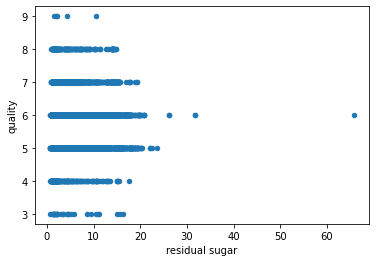

In [37]:
df.plot(x="residual sugar", y="quality", kind="scatter");

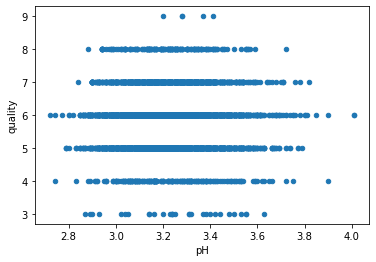

In [38]:
df.plot(x="pH", y="quality", kind="scatter");

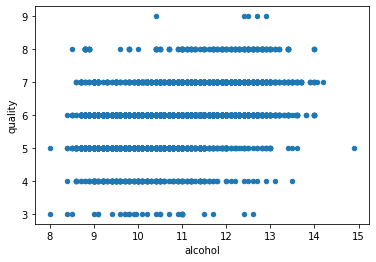

In [39]:
df.plot(x="alcohol", y="quality", kind="scatter");

"Alcohol" has a positive impact on quality. "PH" and "volatile acidity" have negative impact on quality.
Next, we will explore more detail of the data by answering some interesting questions.

### 1. Is a certain type of wine associated with higher quality?

In [40]:
# Find the mean quality of each wine type (red and white) with groupby
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

White wine seems has a higher quality than red wine in this dataset.

### 2. What level of acidity receives the highest average rating?

In [41]:
# View the min, 25%, 50%, 75%, max pH values 
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [42]:
#Fill in the list with five values in the above summary, use Bin edges to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] 

In [44]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] 

In [45]:
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity,acidity_levels
0,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low
1,9.8,0.098,0.00,red,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88,mod_high
2,9.8,0.092,0.04,red,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76,medium
3,9.8,0.075,0.56,red,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28,mod_high
4,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low


In [46]:
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

Low acidity level wine has a higher quality rate.

In [48]:
# replace space with "__" in column name
df.rename(columns = lambda x: x.replace(" ", "_"),inplace=True)

In [50]:
df.head()

,alcohol,chlorides,citric_acid,color,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity,acidity_levels
0,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low
1,9.8,0.098,0.00,red,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88,mod_high
2,9.8,0.092,0.04,red,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76,medium
3,9.8,0.075,0.56,red,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28,mod_high
4,9.4,0.076,0.00,red,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70,low


In [51]:
# Save changes for the next section
df.to_csv('winequality_edited.csv', index=False)

### 3. Do wines with higher alcoholic content receive better ratings?


In [60]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

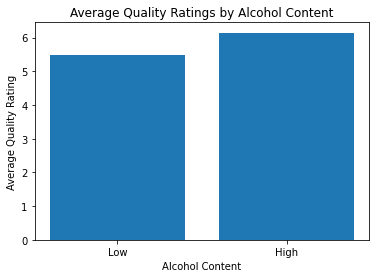

In [61]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

High alcohol content do receive higher rating.

### 4. Do sweeter wines receive higher ratings?


In [62]:
# Use query to select each group and get its mean quality
median_sugar = df['residual_sugar'].median()
median_sugar

3.0

In [63]:
low_sugar = df.query('residual_sugar < 3')
high_sugar = df.query('residual_sugar >= 3')

In [64]:
mean_low_sugar = low_sugar['quality'].mean()
mean_high_sugar = high_sugar['quality'].mean()
print (mean_low_sugar)
mean_high_sugar

5.808800743724822


5.82782874617737

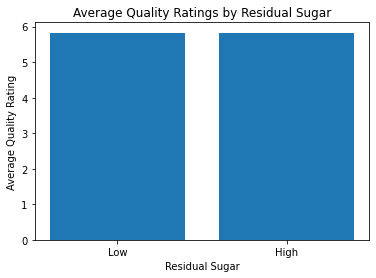

In [65]:
# Create a bar chart with proper labels

locations = [1, 2]
heights = [mean_low_sugar, mean_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

High residual sugar do receive high rating, but the differences is minimal. 

## Conclusion

### Create arrays for red bar heights white bar heights
This is a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [66]:
# get counts for each rating and color
color_counts = df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [67]:
# get total counts for each color
color_totals = df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [68]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [69]:
# although the 9 rating does not exist,
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [70]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [71]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

Now let’s create the plot.

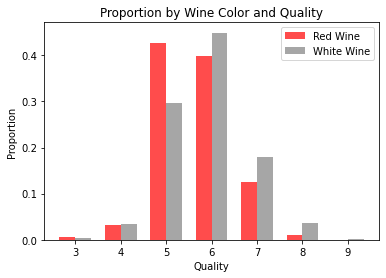

In [72]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='gray', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

Majority of red and white wine get rating 5 and 6, and the red wine get more 5 rating, while white wine gets more 6 rating.